In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time

In [2]:
# baseline model with dropout and data augmentation on the cifar10 dataset
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.layers import BatchNormalization

In [3]:
# load train and test dataset
def load_dataset():
 # load dataset
 (trainX, trainY), (testX, testY) = cifar10.load_data()
 # one hot encode target values
 trainY = to_categorical(trainY)
 testY = to_categorical(testY)
 return trainX, trainY, testX, testY

In [4]:
# scale pixels
def prep_pixels(train, test):
 # convert from integers to floats
 train_norm = train.astype('float32')
 test_norm = test.astype('float32')
 # normalize to range 0-1
 train_norm = train_norm / 255.0
 test_norm = test_norm / 255.0
 # return normalized images
 return train_norm, test_norm

In [5]:
# define cnn model
def define_model():
    new_model = Sequential()
    
    model = tf.keras.applications.ResNet50(
        include_top=False,
        weights=None,
        input_tensor=None,
        input_shape=(32,32,3),
        pooling=None,
        classes=10,
       # classifier_activation="softmax",
    #    **kwargs
        )
    
    
    new_model.add(model)
    #3rd conv layer
    new_model.add(tf.keras.layers.Conv2D(32, 3, padding="same"))
    new_model.add(tf.keras.layers.BatchNormalization())
    new_model.add(tf.keras.layers.Activation("relu"))
    new_model.add(tf.keras.layers.MaxPooling2D(2, padding='same'))
    new_model.add(tf.keras.layers.Dropout(0.2))
    #4th conv layer
    new_model.add(tf.keras.layers.Conv2D(64, 3, padding="same"))
    new_model.add(tf.keras.layers.BatchNormalization())
    new_model.add(tf.keras.layers.Activation("relu"))
    new_model.add(tf.keras.layers.MaxPooling2D(2, padding='same'))
    new_model.add(tf.keras.layers.Dropout(0.2))
    #Flatten Layer
    new_model.add(tf.keras.layers.Flatten())

    new_model.add(tf.keras.layers.Dense(128))
    new_model.add(tf.keras.layers.BatchNormalization())
    new_model.add(tf.keras.layers.Activation("relu"))
    new_model.add(tf.keras.layers.Dropout(0.2))
    #output Dense Layer
    new_model.add(tf.keras.layers.Dense(10))
    new_model.add(tf.keras.layers.Activation('softmax'))
    
    opt = SGD(lr=0.001, momentum=0.9)
    new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return new_model

In [6]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
 # plot loss
    model_trained = history
    accuracy = model_trained.history['accuracy']
    val_accuracy = model_trained.history['val_accuracy']
    loss = model_trained.history['loss']
    val_loss = model_trained.history['val_loss']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Acurácia de treino')
    plt.plot(epochs, val_accuracy, 'g', label='Acurácia de validação')
    plt.title('Acurácia de treino e validação')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'b', label='Perda no treino')
    plt.plot(epochs, val_loss, 'g', label='Perda na validação')
    plt.title('Perda na validação e treino')
    plt.legend()
    plt.show()

In [7]:
epochs = 400
verb = 2

In [8]:
trainX, trainY, testX, testY = load_dataset()
 # prepare pixel data
trainX, testX = prep_pixels(trainX, testX)
 # define model
model = define_model()
 # create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
 # prepare iterator
it_train = datagen.flow(trainX, trainY, batch_size=64)
 # fit model
steps = int(trainX.shape[0] / 64)
history = model.fit(it_train, steps_per_epoch=steps, epochs=epochs, validation_data=(testX, testY), verbose=verb)


Epoch 1/400


C:\Users\tmcle\.conda\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


781/781 - 122s - loss: 2.1880 - accuracy: 0.2043 - val_loss: 1.8714 - val_accuracy: 0.3058 - 122s/epoch - 156ms/step
Epoch 2/400
781/781 - 110s - loss: 1.9198 - accuracy: 0.2899 - val_loss: 1.7104 - val_accuracy: 0.3746 - 110s/epoch - 141ms/step
Epoch 3/400
781/781 - 105s - loss: 1.7718 - accuracy: 0.3497 - val_loss: 1.5754 - val_accuracy: 0.4305 - 105s/epoch - 134ms/step
Epoch 4/400
781/781 - 103s - loss: 1.6712 - accuracy: 0.3953 - val_loss: 1.4969 - val_accuracy: 0.4554 - 103s/epoch - 132ms/step
Epoch 5/400
781/781 - 103s - loss: 1.6085 - accuracy: 0.4179 - val_loss: 1.4323 - val_accuracy: 0.4906 - 103s/epoch - 132ms/step
Epoch 6/400
781/781 - 103s - loss: 1.5523 - accuracy: 0.4431 - val_loss: 1.4191 - val_accuracy: 0.4914 - 103s/epoch - 132ms/step
Epoch 7/400
781/781 - 103s - loss: 1.5108 - accuracy: 0.4621 - val_loss: 1.3481 - val_accuracy: 0.5201 - 103s/epoch - 132ms/step
Epoch 8/400
781/781 - 103s - loss: 1.4655 - accuracy: 0.4774 - val_loss: 1.3124 - val_accuracy: 0.5304 - 103s

Epoch 65/400
781/781 - 103s - loss: 0.5939 - accuracy: 0.8055 - val_loss: 0.8229 - val_accuracy: 0.7294 - 103s/epoch - 132ms/step
Epoch 66/400
781/781 - 103s - loss: 0.5813 - accuracy: 0.8104 - val_loss: 0.8778 - val_accuracy: 0.7193 - 103s/epoch - 132ms/step
Epoch 67/400
781/781 - 103s - loss: 0.5755 - accuracy: 0.8116 - val_loss: 0.8879 - val_accuracy: 0.7132 - 103s/epoch - 132ms/step
Epoch 68/400
781/781 - 103s - loss: 0.5636 - accuracy: 0.8147 - val_loss: 0.8133 - val_accuracy: 0.7380 - 103s/epoch - 132ms/step
Epoch 69/400
781/781 - 103s - loss: 0.5611 - accuracy: 0.8168 - val_loss: 0.8287 - val_accuracy: 0.7264 - 103s/epoch - 132ms/step
Epoch 70/400
781/781 - 103s - loss: 0.5506 - accuracy: 0.8201 - val_loss: 0.8881 - val_accuracy: 0.7203 - 103s/epoch - 132ms/step
Epoch 71/400
781/781 - 103s - loss: 0.5490 - accuracy: 0.8205 - val_loss: 0.7689 - val_accuracy: 0.7513 - 103s/epoch - 132ms/step
Epoch 72/400
781/781 - 103s - loss: 0.5338 - accuracy: 0.8268 - val_loss: 0.7903 - val_acc

Epoch 128/400
781/781 - 103s - loss: 0.2868 - accuracy: 0.9090 - val_loss: 0.8866 - val_accuracy: 0.7529 - 103s/epoch - 132ms/step
Epoch 129/400
781/781 - 103s - loss: 0.2813 - accuracy: 0.9109 - val_loss: 0.8357 - val_accuracy: 0.7650 - 103s/epoch - 132ms/step
Epoch 130/400
781/781 - 103s - loss: 0.2756 - accuracy: 0.9111 - val_loss: 0.8479 - val_accuracy: 0.7623 - 103s/epoch - 132ms/step
Epoch 131/400
781/781 - 103s - loss: 0.2713 - accuracy: 0.9134 - val_loss: 0.8276 - val_accuracy: 0.7652 - 103s/epoch - 132ms/step
Epoch 132/400
781/781 - 103s - loss: 0.2662 - accuracy: 0.9157 - val_loss: 0.8541 - val_accuracy: 0.7622 - 103s/epoch - 132ms/step
Epoch 133/400
781/781 - 103s - loss: 0.2699 - accuracy: 0.9153 - val_loss: 0.8676 - val_accuracy: 0.7623 - 103s/epoch - 132ms/step
Epoch 134/400
781/781 - 103s - loss: 0.2683 - accuracy: 0.9148 - val_loss: 0.8274 - val_accuracy: 0.7702 - 103s/epoch - 132ms/step
Epoch 135/400
781/781 - 103s - loss: 0.2603 - accuracy: 0.9176 - val_loss: 0.9108 -

Epoch 191/400
781/781 - 103s - loss: 0.1539 - accuracy: 0.9522 - val_loss: 0.9155 - val_accuracy: 0.7773 - 103s/epoch - 132ms/step
Epoch 192/400
781/781 - 103s - loss: 0.1468 - accuracy: 0.9542 - val_loss: 0.9369 - val_accuracy: 0.7749 - 103s/epoch - 132ms/step
Epoch 193/400
781/781 - 103s - loss: 0.1448 - accuracy: 0.9554 - val_loss: 0.9329 - val_accuracy: 0.7767 - 103s/epoch - 132ms/step
Epoch 194/400
781/781 - 103s - loss: 0.1505 - accuracy: 0.9532 - val_loss: 0.9771 - val_accuracy: 0.7667 - 103s/epoch - 132ms/step
Epoch 195/400
781/781 - 103s - loss: 0.1441 - accuracy: 0.9559 - val_loss: 0.9415 - val_accuracy: 0.7764 - 103s/epoch - 132ms/step
Epoch 196/400
781/781 - 103s - loss: 0.1404 - accuracy: 0.9565 - val_loss: 0.9321 - val_accuracy: 0.7768 - 103s/epoch - 132ms/step
Epoch 197/400
781/781 - 103s - loss: 0.1377 - accuracy: 0.9562 - val_loss: 0.9525 - val_accuracy: 0.7708 - 103s/epoch - 132ms/step
Epoch 198/400
781/781 - 103s - loss: 0.1430 - accuracy: 0.9556 - val_loss: 0.9232 -

Epoch 254/400
781/781 - 103s - loss: 0.0922 - accuracy: 0.9719 - val_loss: 1.0776 - val_accuracy: 0.7678 - 103s/epoch - 132ms/step
Epoch 255/400
781/781 - 103s - loss: 0.0937 - accuracy: 0.9711 - val_loss: 0.9955 - val_accuracy: 0.7812 - 103s/epoch - 132ms/step
Epoch 256/400
781/781 - 103s - loss: 0.0924 - accuracy: 0.9717 - val_loss: 0.9675 - val_accuracy: 0.7861 - 103s/epoch - 132ms/step
Epoch 257/400
781/781 - 103s - loss: 0.0926 - accuracy: 0.9717 - val_loss: 1.0459 - val_accuracy: 0.7716 - 103s/epoch - 132ms/step
Epoch 258/400
781/781 - 103s - loss: 0.0900 - accuracy: 0.9722 - val_loss: 0.9606 - val_accuracy: 0.7901 - 103s/epoch - 132ms/step
Epoch 259/400
781/781 - 103s - loss: 0.0871 - accuracy: 0.9738 - val_loss: 0.9912 - val_accuracy: 0.7834 - 103s/epoch - 132ms/step
Epoch 260/400
781/781 - 103s - loss: 0.0860 - accuracy: 0.9737 - val_loss: 0.9870 - val_accuracy: 0.7820 - 103s/epoch - 132ms/step
Epoch 261/400
781/781 - 103s - loss: 0.0840 - accuracy: 0.9744 - val_loss: 1.0155 -

Epoch 317/400
781/781 - 103s - loss: 0.0684 - accuracy: 0.9791 - val_loss: 1.0712 - val_accuracy: 0.7819 - 103s/epoch - 132ms/step
Epoch 318/400
781/781 - 103s - loss: 0.0634 - accuracy: 0.9813 - val_loss: 1.0609 - val_accuracy: 0.7847 - 103s/epoch - 132ms/step
Epoch 319/400
781/781 - 103s - loss: 0.0643 - accuracy: 0.9797 - val_loss: 1.0894 - val_accuracy: 0.7788 - 103s/epoch - 132ms/step
Epoch 320/400
781/781 - 103s - loss: 0.0602 - accuracy: 0.9821 - val_loss: 1.0535 - val_accuracy: 0.7884 - 103s/epoch - 132ms/step
Epoch 321/400
781/781 - 103s - loss: 0.0615 - accuracy: 0.9812 - val_loss: 1.0746 - val_accuracy: 0.7837 - 103s/epoch - 132ms/step
Epoch 322/400
781/781 - 103s - loss: 0.0599 - accuracy: 0.9817 - val_loss: 1.0546 - val_accuracy: 0.7837 - 103s/epoch - 132ms/step
Epoch 323/400
781/781 - 103s - loss: 0.0613 - accuracy: 0.9815 - val_loss: 1.0640 - val_accuracy: 0.7848 - 103s/epoch - 132ms/step
Epoch 324/400
781/781 - 103s - loss: 0.0647 - accuracy: 0.9807 - val_loss: 1.1103 -

Epoch 380/400
781/781 - 103s - loss: 0.0456 - accuracy: 0.9860 - val_loss: 1.0350 - val_accuracy: 0.7965 - 103s/epoch - 132ms/step
Epoch 381/400
781/781 - 103s - loss: 0.0467 - accuracy: 0.9859 - val_loss: 1.0483 - val_accuracy: 0.7937 - 103s/epoch - 132ms/step
Epoch 382/400
781/781 - 103s - loss: 0.0489 - accuracy: 0.9856 - val_loss: 1.0447 - val_accuracy: 0.7939 - 103s/epoch - 132ms/step
Epoch 383/400
781/781 - 103s - loss: 0.0480 - accuracy: 0.9852 - val_loss: 1.0396 - val_accuracy: 0.7893 - 103s/epoch - 132ms/step
Epoch 384/400
781/781 - 103s - loss: 0.0399 - accuracy: 0.9883 - val_loss: 1.0503 - val_accuracy: 0.7943 - 103s/epoch - 132ms/step
Epoch 385/400
781/781 - 103s - loss: 0.0479 - accuracy: 0.9852 - val_loss: 1.0894 - val_accuracy: 0.7863 - 103s/epoch - 132ms/step
Epoch 386/400
781/781 - 103s - loss: 0.0475 - accuracy: 0.9857 - val_loss: 1.1164 - val_accuracy: 0.7787 - 103s/epoch - 132ms/step
Epoch 387/400
781/781 - 103s - loss: 0.0447 - accuracy: 0.9864 - val_loss: 1.2304 -

In [9]:
 # evaluate model
_, acc = model.evaluate(testX, testY, verbose=verb)
print('Acurácia: %.3f' % (acc * 100.0))

313/313 - 8s - loss: 1.1073 - accuracy: 0.7820 - 8s/epoch - 25ms/step
Acurácia: 78.200


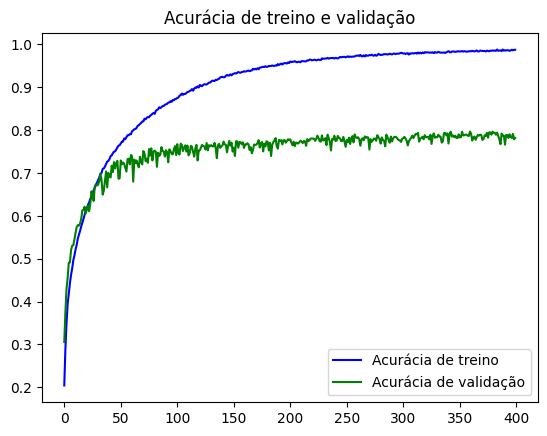

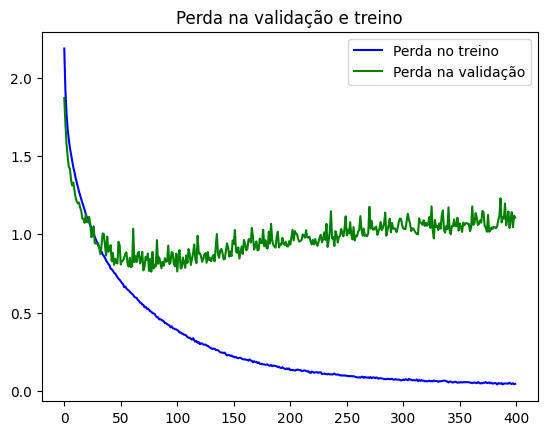

In [10]:
 # learning curves
summarize_diagnostics(history)

In [11]:
model_name = f'cifar-resnet50-baseline-holdout-{epochs}epochs_dropout_batch_augmentation.npy'
model.save(model_name)

INFO:tensorflow:Assets written to: cifar-resnet50-baseline-holdout-400epochs_dropout_batch_augmentation.npy\assets


INFO:tensorflow:Assets written to: cifar-resnet50-baseline-holdout-400epochs_dropout_batch_augmentation.npy\assets


In [12]:
# entry point, run the test harness
#run_test_harness(epochs=100, verb=1)